In [ ]:
# wikipedia code taken from: 
# https://medium.com/analytics-vidhya/web-scraping-a-wikipedia-table-into-a-dataframe-c52617e1f451
# fuzzy matching code taken from:
# https://github.com/RobinL/fuzzymatcher/blob/master/examples.ipynb

In [1]:
import pandas as pd # library for data analysis
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documentsimport fuzzymatcher
import fuzzymatcher
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting
import seaborn as sns
import logging
import numpy as np
logging.basicConfig(level=logging.DEBUG)
from pylab import rcParams
rcParams['figure.figsize'] = 16, 6
from pandas.io.html import read_html
import json
from pandas.io.json import json_normalize

In [2]:
#first data frame to merge w/ HW data set. Adds football stadium capacity
wikiurl="https://en.wikipedia.org/wiki/List_of_NCAA_Division_I_FBS_football_stadiums"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): en.wikipedia.org:443
DEBUG:urllib3.connectionpool:https://en.wikipedia.org:443 "GET /wiki/List_of_NCAA_Division_I_FBS_football_stadiums HTTP/1.1" 200 None


200


In [3]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
stadiumtable=soup.find('table',{'class':"wikitable"})

In [4]:
df=pd.read_html(str(stadiumtable))
# convert list to dataframe
df=pd.DataFrame(df[0])
#df

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [5]:
# Combine data frames
df_left = pd.read_csv("https://raw.githubusercontent.com/2SUBDA/IST_718/master/Coaches9.csv")
df_right = df
left_on = ["School", "Conference"]
right_on = ["Team", "Conference"]

combineddf = fuzzymatcher.fuzzy_left_join(df_left, df_right, left_on, right_on)
#combineddf

DEBUG:fuzzymatcher.matcher:Matching 129 left records against 130 right records
DEBUG:fuzzymatcher.matcher:Processed 129 records, 100% done in 0 minutes and 0 seconds


In [6]:
seconddf = combineddf.drop(['__id_left', '__id_right'], axis=1)

In [11]:
# get last table with win/loss percentage for each team
url = 'https://en.wikipedia.org/wiki/NCAA_Division_I_FBS_football_win-loss_records'
re = requests.get(url, headers =  {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'})
df = pd.read_html(re.text)
winloss = df[2]
winloss

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): en.wikipedia.org:443
DEBUG:urllib3.connectionpool:https://en.wikipedia.org:443 "GET /wiki/NCAA_Division_I_FBS_football_win-loss_records HTTP/1.1" 200 19502


,Team,Won,Lost,Tied,Pct.,Years,Total Games,Conference
0,Ohio State 1,931,327,53,0.730,130,1311,Big Ten
1,Alabama 2,929,331,43,0.729,125,1303,SEC
2,Notre Dame 3,918,328,42,0.729,130,1288,Independent
3,Boise State,465,172,2,0.729,52,639,Mountain West
4,Michigan,964,350,36,0.727,140,1350,Big Ten
5,Oklahoma,917,329,53,0.726,125,1299,Big 12
6,Texas,923,378,33,0.704,127,1334,Big 12
7,Southern California 4,852,352,54,0.699,127,1258,Pac-12
8,Nebraska,905,400,40,0.688,130,1345,Big Ten
9,Penn State,902,398,41,0.688,133,1341,Big Ten


In [12]:
pd.set_option('display.min_rows', None)

df_left = seconddf
df_right = winloss
left_on = ["School", "Conference_left"]
right_on = ["Team", "Conference"]

finaldf = fuzzymatcher.fuzzy_left_join(df_left, df_right, left_on, right_on)
finaldf

DEBUG:fuzzymatcher.matcher:Matching 129 left records against 130 right records
DEBUG:fuzzymatcher.matcher:Processed 129 records, 100% done in 0 minutes and 0 seconds


,best_match_score,__id_left,__id_right,best_match_score,School,Conference_left,Coach,SchoolPay,TotalPay,Bonus,...,Expanded 2,Surface,Team_right,Won,Lost,Tied,Pct.,Years,Total Games,Conference
0,0.354887,0_left,63_right,0.348533,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,...,NaN,FieldTurf,Air Force,404.0,332.0,13.0,0.548,64.0,749.0,Mountain West
1,0.239483,1_left,100_right,0.235611,Akron,MAC,Terry Bowden,"$411,000","$412,500","$225,000",...,NaN,ProGrass Artificial Turf,Akron,524.0,563.0,36.0,0.483,119.0,1123.0,MAC
2,0.138035,2_left,1_right,0.211079,Alabama,SEC,Nick Saban,"$8,307,000","$8,307,000","$1,100,000",...,2010[28],Grass,Alabama 2,929.0,331.0,43.0,0.729,125.0,1303.0,SEC
3,-0.140287,3_left,72_right,-0.135934,Alabama at Birmingham,C-USA,Bill Clark,"$900,000","$900,000","$950,000",...,2010[28],Grass,Marshall,606.0,554.0,47.0,0.522,120.0,1207.0,C-USA
19,0.396328,4_left,14_right,0.388583,Appalachian State,Sun Belt,Scott Satterfield,"$712,500","$712,500","$295,000",...,2017,FieldTurf,Appalachian State,639.0,339.0,29.0,0.649,90.0,1007.0,Sun Belt
20,0.236376,5_left,52_right,0.231807,Arizona,Pac-12,Kevin Sumlin,"$1,600,000","$2,000,000","$2,025,000",...,1988[9],FieldTurf,Arizona,617.0,478.0,33.0,0.562,116.0,1128.0,Pac-12
22,0.299316,6_left,23_right,0.293141,Arizona State,Pac-12,Herm Edwards,"$2,000,000","$2,000,000","$3,010,000",...,2016,Bermuda Grass,Arizona State,624.0,401.0,24.0,0.606,107.0,1049.0,Pac-12
23,0.214952,7_left,38_right,0.211079,Arkansas,SEC,Chad Morris,"$3,500,000","$3,500,000","$1,000,000",...,2006[122],PowerBlade HP,Arkansas,720.0,521.0,40.0,0.578,126.0,1281.0,SEC
24,0.299343,8_left,93_right,0.368514,Arkansas State,Sun Belt,Blake Anderson,"$825,000","$825,000","$185,000",...,2002[44],ProGreen,Arkansas State 10,485.0,499.0,37.0,0.493,105.0,1021.0,Sun Belt
25,0.055858,9_left,47_right,0.054948,Army,Ind.,Jeff Monken,932521,932521,--,...,2001[19],Field Turf,Army,706.0,529.0,51.0,0.569,130.0,1286.0,Independent


In [13]:
finaldf = finaldf[['Coach', 'TotalPay', 'Conference', 'SchoolPay', 'Bonus', 'Stadium', 'Capacity', 'Won', 'Lost', 'Pct.', 'Total Games', 'Years', 'Team_left']]
finaldf

,Coach,TotalPay,Conference,SchoolPay,Bonus,Stadium,Capacity,Won,Lost,Pct.,Total Games,Years,Team_left
0,Troy Calhoun,885000,Mountain West,885000,247000,Falcon Stadium,"46,692[59]",404.0,332.0,0.548,749.0,64.0,Air Force
1,Terry Bowden,"$412,500",MAC,"$411,000","$225,000",InfoCision Stadium–Summa Field,"30,000[72]",524.0,563.0,0.483,1123.0,119.0,Akron
2,Nick Saban,"$8,307,000",SEC,"$8,307,000","$1,100,000",Bryant–Denny Stadium,"101,821[28]",929.0,331.0,0.729,1303.0,125.0,Alabama
3,Bill Clark,"$900,000",C-USA,"$900,000","$950,000",Bryant–Denny Stadium,"101,821[28]",606.0,554.0,0.522,1207.0,120.0,Alabama
19,Scott Satterfield,"$712,500",Sun Belt,"$712,500","$295,000",Kidd Brewer Stadium,30000,639.0,339.0,0.649,1007.0,90.0,Appalachian State
20,Kevin Sumlin,"$2,000,000",Pac-12,"$1,600,000","$2,025,000",Arizona Stadium,"56,029[9]",617.0,478.0,0.562,1128.0,116.0,Arizona
22,Herm Edwards,"$2,000,000",Pac-12,"$2,000,000","$3,010,000",Frank Kush Field at Sun Devil Stadium,"56,232[63]",624.0,401.0,0.606,1049.0,107.0,Arizona State
23,Chad Morris,"$3,500,000",SEC,"$3,500,000","$1,000,000","Donald W. Reynolds Razorback Stadium, Frank Br...","76,212[122]",720.0,521.0,0.578,1281.0,126.0,Arkansas
24,Blake Anderson,"$825,000",Sun Belt,"$825,000","$185,000",Centennial Bank Stadium,"30,964[44]",485.0,499.0,0.493,1021.0,105.0,Arkansas State
25,Jeff Monken,932521,Independent,932521,--,Blaik Field at Michie Stadium,"38,000[19]",706.0,529.0,0.569,1286.0,130.0,Army


In [14]:
# clean Capacity variable to remove capacity records
finaldf["Capacity"]= finaldf["Capacity"].str.split("[", n = 2, expand = True)  
finaldf

<ipython-input-14-5a200c46b290>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finaldf["Capacity"]= finaldf["Capacity"].str.split("[", n = 2, expand = True)


,Coach,TotalPay,Conference,SchoolPay,Bonus,Stadium,Capacity,Won,Lost,Pct.,Total Games,Years,Team_left
0,Troy Calhoun,885000,Mountain West,885000,247000,Falcon Stadium,"46,692",404.0,332.0,0.548,749.0,64.0,Air Force
1,Terry Bowden,"$412,500",MAC,"$411,000","$225,000",InfoCision Stadium–Summa Field,"30,000",524.0,563.0,0.483,1123.0,119.0,Akron
2,Nick Saban,"$8,307,000",SEC,"$8,307,000","$1,100,000",Bryant–Denny Stadium,"101,821",929.0,331.0,0.729,1303.0,125.0,Alabama
3,Bill Clark,"$900,000",C-USA,"$900,000","$950,000",Bryant–Denny Stadium,"101,821",606.0,554.0,0.522,1207.0,120.0,Alabama
19,Scott Satterfield,"$712,500",Sun Belt,"$712,500","$295,000",Kidd Brewer Stadium,30000,639.0,339.0,0.649,1007.0,90.0,Appalachian State
20,Kevin Sumlin,"$2,000,000",Pac-12,"$1,600,000","$2,025,000",Arizona Stadium,"56,029",617.0,478.0,0.562,1128.0,116.0,Arizona
22,Herm Edwards,"$2,000,000",Pac-12,"$2,000,000","$3,010,000",Frank Kush Field at Sun Devil Stadium,"56,232",624.0,401.0,0.606,1049.0,107.0,Arizona State
23,Chad Morris,"$3,500,000",SEC,"$3,500,000","$1,000,000","Donald W. Reynolds Razorback Stadium, Frank Br...","76,212",720.0,521.0,0.578,1281.0,126.0,Arkansas
24,Blake Anderson,"$825,000",Sun Belt,"$825,000","$185,000",Centennial Bank Stadium,"30,964",485.0,499.0,0.493,1021.0,105.0,Arkansas State
25,Jeff Monken,932521,Independent,932521,--,Blaik Field at Michie Stadium,"38,000",706.0,529.0,0.569,1286.0,130.0,Army


In [15]:
# clean data for exploratory analysis
finaldf.TotalPay = finaldf.TotalPay.str.replace(',', '')
finaldf.TotalPay = finaldf.TotalPay.str.replace('$', '')
finaldf.TotalPay = finaldf.TotalPay.str.replace('--', '')
finaldf.TotalPay.replace('', np.nan, inplace=True)
finaldf.dropna(subset=['TotalPay'], inplace=True)
finaldf.TotalPay = finaldf.TotalPay.astype(int)

finaldf.SchoolPay = finaldf.SchoolPay.str.replace(',', '')
finaldf.SchoolPay = finaldf.SchoolPay.str.replace('$', '')
finaldf.SchoolPay = finaldf.SchoolPay.str.replace('--', '')
finaldf.SchoolPay.replace('', np.nan, inplace=True)
finaldf.dropna(subset=['SchoolPay'], inplace=True)
finaldf.SchoolPay = finaldf.SchoolPay.astype(int)

finaldf.Capacity = finaldf.Capacity.str.replace(',', '')
finaldf.Capacity = finaldf.Capacity.str.replace('$', '')
finaldf.Capacity = finaldf.Capacity.str.replace('--', '')
finaldf.Capacity.replace('', np.nan, inplace=True)
finaldf.dropna(subset=['Capacity'], inplace=True)
finaldf.Capacity = finaldf.Capacity.astype(int)

finaldf

C:\Users\timho\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\timho\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-15-175adad8eb8a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finaldf.dropna(subset=[

,Coach,TotalPay,Conference,SchoolPay,Bonus,Stadium,Capacity,Won,Lost,Pct.,Total Games,Years,Team_left
0,Troy Calhoun,885000,Mountain West,885000,247000,Falcon Stadium,46692,404.0,332.0,0.548,749.0,64.0,Air Force
1,Terry Bowden,412500,MAC,411000,"$225,000",InfoCision Stadium–Summa Field,30000,524.0,563.0,0.483,1123.0,119.0,Akron
2,Nick Saban,8307000,SEC,8307000,"$1,100,000",Bryant–Denny Stadium,101821,929.0,331.0,0.729,1303.0,125.0,Alabama
3,Bill Clark,900000,C-USA,900000,"$950,000",Bryant–Denny Stadium,101821,606.0,554.0,0.522,1207.0,120.0,Alabama
19,Scott Satterfield,712500,Sun Belt,712500,"$295,000",Kidd Brewer Stadium,30000,639.0,339.0,0.649,1007.0,90.0,Appalachian State
20,Kevin Sumlin,2000000,Pac-12,1600000,"$2,025,000",Arizona Stadium,56029,617.0,478.0,0.562,1128.0,116.0,Arizona
22,Herm Edwards,2000000,Pac-12,2000000,"$3,010,000",Frank Kush Field at Sun Devil Stadium,56232,624.0,401.0,0.606,1049.0,107.0,Arizona State
23,Chad Morris,3500000,SEC,3500000,"$1,000,000","Donald W. Reynolds Razorback Stadium, Frank Br...",76212,720.0,521.0,0.578,1281.0,126.0,Arkansas
24,Blake Anderson,825000,Sun Belt,825000,"$185,000",Centennial Bank Stadium,30964,485.0,499.0,0.493,1021.0,105.0,Arkansas State
25,Jeff Monken,932521,Independent,932521,--,Blaik Field at Michie Stadium,38000,706.0,529.0,0.569,1286.0,130.0,Army


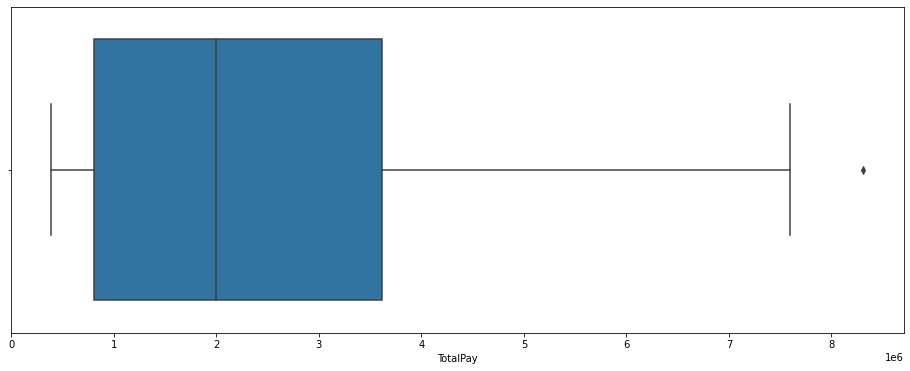

In [17]:
# Grand mean coaches salary
sns.boxplot(x="TotalPay", data=finaldf);
plt.show()

<AxesSubplot:xlabel='TotalPay', ylabel='Count'>

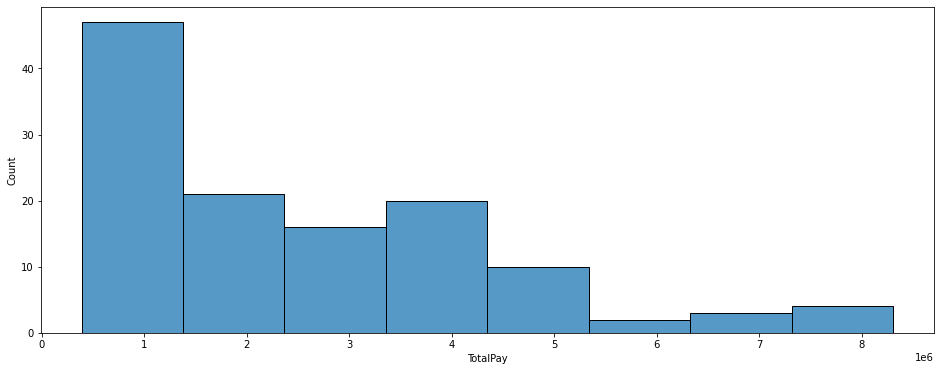

In [310]:
sns.histplot(data=finaldf, x="TotalPay")

<AxesSubplot:xlabel='Capacity', ylabel='Count'>

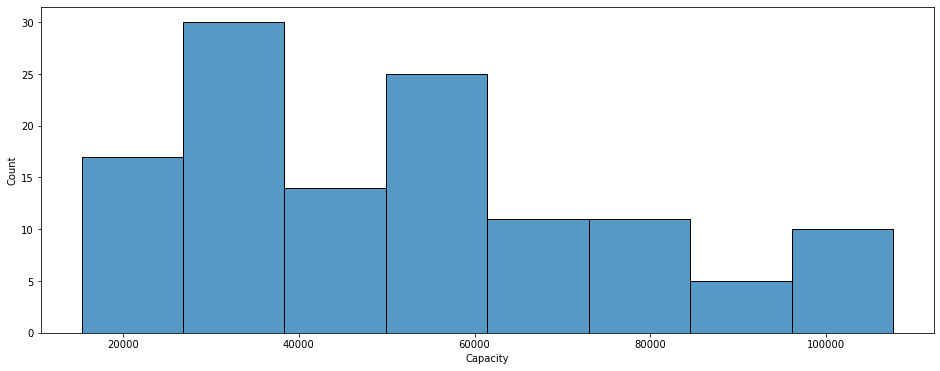

In [311]:
sns.histplot(data=finaldf, x="Capacity")

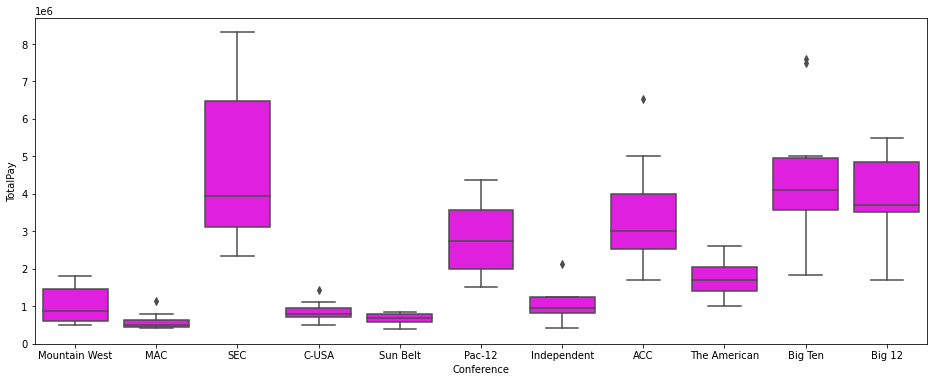

In [312]:
# Salary breakdown across conferences
sns.boxplot(x="Conference", y="TotalPay", data=finaldf, color = "magenta");
plt.show()

In [313]:
acc = finaldf[finaldf['Conference'] == 'ACC']
acc[['TotalPay']].mean(axis=0)

TotalPay    3.318210e+06
dtype: float64

In [314]:
acc = finaldf[finaldf['Conference'] == 'Sun Belt']
acc[['TotalPay']].mean(axis=0)

TotalPay    650650.0
dtype: float64

In [315]:
print(finaldf[['TotalPay']].mean(axis=0))

TotalPay    2.443354e+06
dtype: float64


In [316]:
finaldf = finaldf.sort_values(by=['Capacity'])

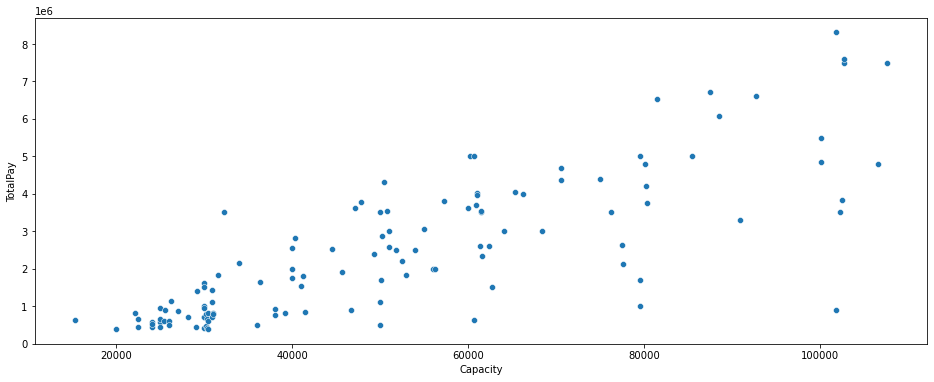

In [317]:
sns.scatterplot(data = finaldf, x = "Capacity", y = "TotalPay")
plt.show()

In [18]:
sns.scatterplot(data = finaldf, x = "WinPct", y = "TotalPay")
plt.show()

ValueError: Could not interpret value `WinPct` for parameter `x`

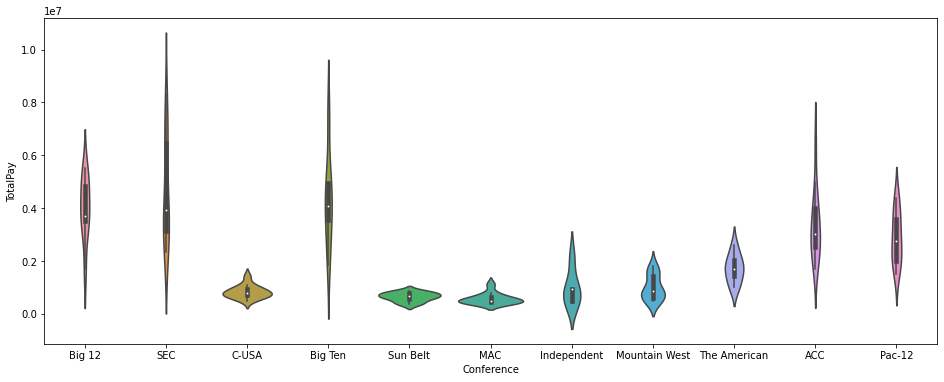

In [207]:
ax = sns.violinplot(x="Conference", y="TotalPay", data=finaldf)

In [319]:
# cut final df Capacity variable into three categorical variables: Small, Medium, Large
finaldf['StadiumSize'] = pd.cut(finaldf.Capacity,bins=[0,30000,60000,120000],labels=['Small','Medium','Large'])
finaldf

,Coach,TotalPay,Conference,SchoolPay,Bonus,Stadium,Capacity,Won,Lost,Pct.,Total Games,Years,Team_left,StadiumSize
42,Brad Lambert,625000,C-USA,625000,"$120,000",McColl–Richardson Field at Jerry Richardson St...,15314,34.0,62.0,0.354,96.0,9.0,Charlotte,Small
45,Joe Moglia,400000,Sun Belt,400000,"$800,000",Brooks Stadium,20000,138.0,78.0,0.639,216.0,17.0,Coastal Carolina,Small
182,Mike Sanford Jr.,805850,C-USA,800000,"$400,000",Houchens Industries–L. T. Smith Stadium at Jim...,22113,589.0,411.0,0.586,1030.0,101.0,Western Kentucky,Small
136,Bobby Wilder,654667,C-USA,654667,"$504,895",Kornblau Field at S.B. Ballard Stadium,22480,77.0,56.0,0.579,133.0,11.0,Old Dominion,Small
27,Mike Neu,435689,MAC,435689,"$380,000",Scheumann Stadium,22500,461.0,434.0,0.515,927.0,95.0,Ball State,Small
31,Mike Jinks,437228,MAC,437228,"$245,000",Doyt L. Perry Stadium,24000,545.0,405.0,0.570,1002.0,101.0,Bowling Green,Small
131,Frank Solich,580331,MAC,580331,"$333,833",Peden Stadium,24000,580.0,568.0,0.505,1196.0,124.0,Ohio,Small
85,Chuck Martin,524826,MAC,524826,"$582,110",Peden Stadium,24000,580.0,568.0,0.505,1196.0,124.0,Ohio,Small
73,Turner Gill,947281,Independent,947281,--,Arthur L. Williams Stadium,25000,270.0,243.0,0.526,517.0,47.0,Liberty,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


<AxesSubplot:xlabel='StadiumSize', ylabel='Count'>

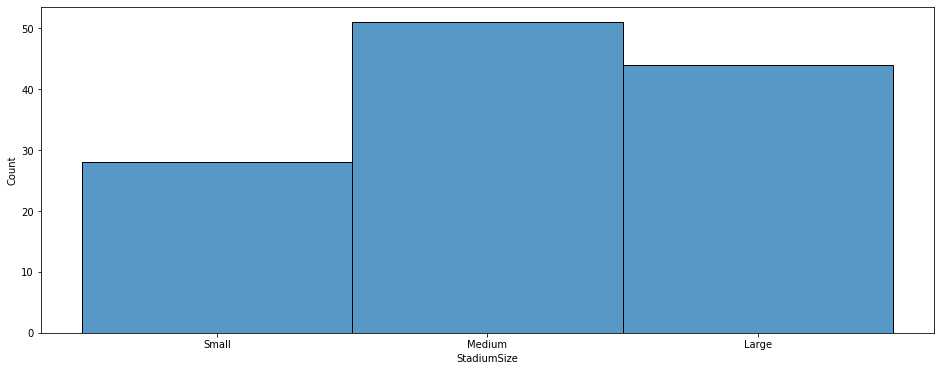

In [240]:
sns.histplot(data=finaldf, x="StadiumSize")

<AxesSubplot:xlabel='Years', ylabel='Count'>

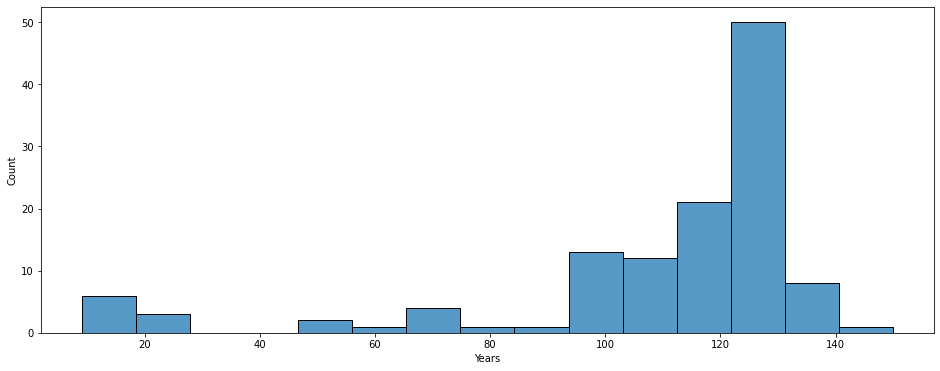

In [295]:
sns.histplot(data=finaldf, x="Years")

In [328]:
small = finaldf[finaldf['StadiumSize'] == 'Small']
print(small[['Years']].mean(axis=0))

Years    80.142857
dtype: float64


In [329]:
large = finaldf[finaldf['StadiumSize'] == 'Large']
print(large[['Years']].mean(axis=0))

Years    118.477273
dtype: float64


In [22]:
finaldf[finaldf['WinPct'] > .65]

,Coach,TotalPay,Conference,SchoolPay,Bonus,Stadium,Capacity,Won,Lost,Pct.,Total Games,Years,Team_left,WinPct,GamesPlayed
2,Nick Saban,8307000,SEC,8307000,"$1,100,000",Bryant–Denny Stadium,101821,929.0,331.0,0.729,1303.0,125.0,Alabama,0.729,1303.0
29,Bryan Harsin,1650010,Mountain West,1650010,"$475,000",Albertsons Stadium,36387,465.0,172.0,0.729,639.0,52.0,Boise State,0.729,639.0
36,Josh Heupel,1700000,ACC,1700000,"$250,000",Bobby Bowden Field at Doak S. Campbell Stadium,79560,553.0,270.0,0.668,840.0,73.0,Florida State,0.668,840.0
55,Willie Taggart,5000000,ACC,5000000,"$1,475,000",Bobby Bowden Field at Doak S. Campbell Stadium,79560,553.0,270.0,0.668,840.0,73.0,Florida State,0.668,840.0
57,Kirby Smart,6603600,SEC,6603600,"$1,150,000",Sanford Stadium,92746,831.0,425.0,0.655,1310.0,126.0,Georgia,0.655,1310.0
79,Ed Orgeron,3500000,SEC,3500000,"$1,575,000",Tiger Stadium,102321,817.0,420.0,0.655,1284.0,126.0,LSU,0.655,1284.0
86,Jim Harbaugh,7504000,Big Ten,7504000,"$1,325,000",Michigan Stadium,107601,964.0,350.0,0.727,1350.0,140.0,Michigan,0.727,1350.0
95,Scott Frost,5000000,Big Ten,5000000,"$950,000","Memorial Stadium, Tom Osborne Field",85458,905.0,400.0,0.688,1345.0,130.0,Nebraska,0.688,1345.0
130,Brian Kelly,2129638,Independent,2129638,--,Notre Dame Stadium,77622,918.0,328.0,0.729,1288.0,130.0,Notre Dame,0.729,1288.0
132,Urban Meyer,7600000,Big Ten,7600000,"$775,000",Ohio Stadium,102780,931.0,327.0,0.730,1311.0,130.0,Ohio State,0.730,1311.0


In [259]:
#1st iteration - remove Lost (P = .68)
#2nd iteration - remove Years (P = .4)
#3rd iteration - remove WinPct (P = .15)
salary_model = str('TotalPay ~ Conference + Capacity + Won + GamesPlayed')
salary_model_fit = smf.ols(salary_model, data=finaldf).fit()
print(salary_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     33.49
Date:                Sun, 25 Jul 2021   Prob (F-statistic):           4.34e-32
Time:                        11:06:46   Log-Likelihood:                -1852.7
No. Observations:                 123   AIC:                             3733.
Df Residuals:                     109   BIC:                             3773.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [250]:
finaldf.corr()

,TotalPay,SchoolPay,Capacity,Won,Lost,Pct.,Total Games,Years,WinPct,GamesPlayed
TotalPay,1.000000,0.999689,0.808542,0.648167,0.068655,0.547748,0.473676,0.415314,0.547748,0.473676
SchoolPay,0.999689,1.000000,0.808285,0.647948,0.068654,0.547404,0.473517,0.415092,0.547404,0.473517
Capacity,0.808542,0.808285,1.000000,0.665960,0.004241,0.627025,0.453970,0.382675,0.627025,0.453970
Won,0.648167,0.647948,0.665960,1.000000,0.414167,0.707221,0.886818,0.837781,0.707221,0.886818
Lost,0.068655,0.068654,0.004241,0.414167,1.000000,-0.261046,0.787240,0.824794,-0.261046,0.787240
Pct.,0.547748,0.547404,0.627025,0.707221,-0.261046,1.000000,0.344594,0.261080,1.000000,0.344594
Total Games,0.473676,0.473517,0.453970,0.886818,0.787240,0.344594,1.000000,0.986107,0.344594,1.000000
Years,0.415314,0.415092,0.382675,0.837781,0.824794,0.261080,0.986107,1.000000,0.261080,0.986107
WinPct,0.547748,0.547404,0.627025,0.707221,-0.261046,1.000000,0.344594,0.261080,1.000000,0.344594
GamesPlayed,0.473676,0.473517,0.453970,0.886818,0.787240,0.344594,1.000000,0.986107,0.344594,1.000000


In [252]:
len(finaldf)
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 0 to 185
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Coach        123 non-null    object  
 1   TotalPay     123 non-null    int32   
 2   Conference   123 non-null    object  
 3   SchoolPay    123 non-null    int32   
 4   Bonus        123 non-null    object  
 5   Stadium      123 non-null    object  
 6   Capacity     123 non-null    int32   
 7   Won          123 non-null    float64 
 8   Lost         123 non-null    float64 
 9   Pct.         123 non-null    float64 
 10  Total Games  123 non-null    float64 
 11  Years        123 non-null    float64 
 12  StadiumSize  123 non-null    category
 13  WinPct       123 non-null    float64 
 14  GamesPlayed  123 non-null    float64 
dtypes: category(1), float64(7), int32(3), object(4)
memory usage: 13.2+ KB


In [268]:
cuse = finaldf[finaldf['Team_left'] == 'Syracuse']
cuse

,Coach,TotalPay,Conference,SchoolPay,Bonus,Stadium,Capacity,Won,Lost,Pct.,Total Games,Years,Team_left
155,Dino Babers,"$2,401,206",ACC,"$2,401,206",--,Carrier Dome,"49,250[41]",725.0,557.0,0.563,1331.0,130.0,Syracuse


In [271]:
(195100*1) + (17.04*49250) + (5170*725) - (2543*1331)

1397837.0